In [12]:
import pprint
import numpy as np

from sklearn.linear_model import *
from lineartree import LinearTreeClassifier, LinearTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification, make_regression

import warnings
warnings.simplefilter('ignore')

# Regression

In [13]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=1,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[t] += X[t][:,3]*X[t][:,4]
y[~t] += X[~t][:,1]*X[~t][:,2]

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[t] += X[t][:,6]*X[t][:,7]
y[~t] += X[~t][:,8]*X[~t][:,9]

X.shape, y.shape

((5000, 10), (5000,))

### default configuration 

In [14]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

In [15]:
regr.feature_importances_

array([0.        , 0.15034414, 0.1703983 , 0.16322298, 0.        ,
       0.        , 0.        , 0.        , 0.12494112, 0.39109346])

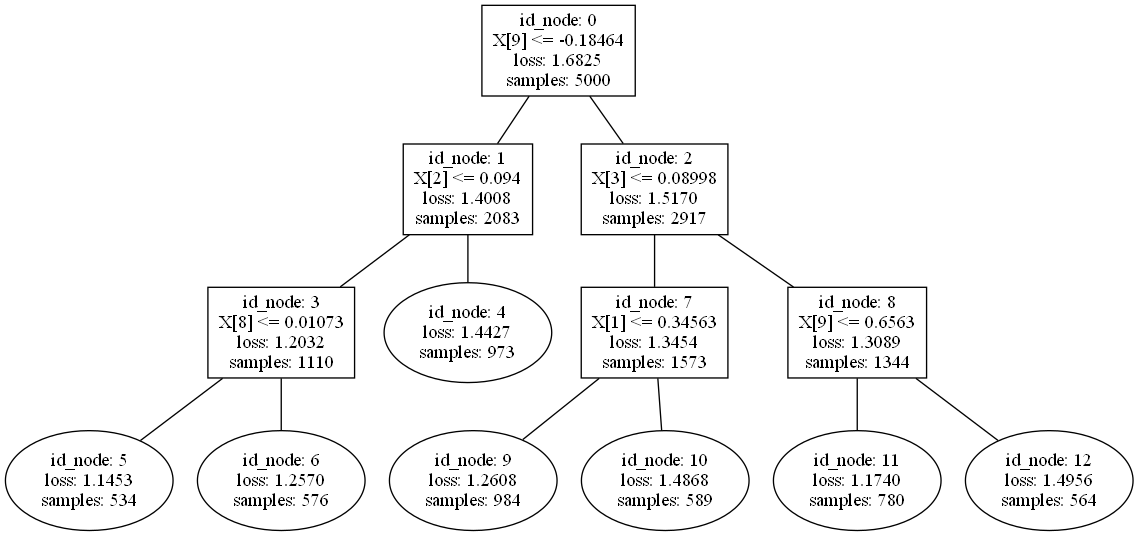

In [16]:
regr.plot_model()

In [17]:
pprint.pprint(regr.summary())

{0: {'children': (1, 2),
     'col': 9,
     'loss': 1.68251,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 5000,
     'th': -0.18464},
 1: {'children': (3, 4),
     'col': 2,
     'loss': 1.4008,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2083,
     'th': 0.094},
 2: {'children': (7, 8),
     'col': 3,
     'loss': 1.51698,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2917,
     'th': 0.08998},
 3: {'children': (5, 6),
     'col': 8,
     'loss': 1.20325,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1110,
     'th': 0.01073},
 4: {'loss': 1.44269, 'models': LinearRegression(), 'samples': 973},
 5: {'loss': 1.14525, 'models': LinearRegression(), 'samples': 534},
 6: {'loss': 1.25703, 'models': LinearRegression(), 'samples': 576},
 7: {'children': (9, 10),
     'col': 1,
     'loss': 1.34542,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1573,
     

In [18]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 13), 0.9998658335980741)

### using linear_features

In [19]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2])

In [20]:
regr.feature_importances_

array([0.32123659, 0.22884655, 0.40982417, 0.01760782, 0.        ,
       0.        , 0.        , 0.02248488, 0.        , 0.        ])

In [21]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998467954928835)

### using split_features

In [22]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    split_features=[0, 1, 2, 3, 4])

In [23]:
regr.feature_importances_

array([0.67775556, 0.        , 0.10825779, 0.1013291 , 0.11265755,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [24]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998658407000435)

### using linear_features + split_features

In [25]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2, 5, 6],
                    split_features=[0, 1, 2, 3, 4])

In [26]:
regr.feature_importances_

array([0.31934091, 0.24955919, 0.40197962, 0.02912028, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [27]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.999847741958613)

### using linear_features + split_features + categorical_features

In [28]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,3],
    categorical_features=[3,7]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[3, 7],
                    linear_features=[0, 1, 2, 5, 6], split_features=[0, 1, 3])

In [29]:
regr.feature_importances_

array([0.29751991, 0.66369077, 0.        , 0.03878932, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [30]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998453110496642)

### mae criterion

In [31]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mae')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='mae')

In [32]:
regr.feature_importances_

array([0.12267055, 0.        , 0.13439981, 0.26153566, 0.        ,
       0.        , 0.        , 0.        , 0.14019823, 0.34119575])

In [33]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.999870061024891)

### poisson criterion 

In [34]:
regr = LinearTreeRegressor(LinearRegression(), criterion='poisson')
regr.fit(X, np.abs(y))

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='poisson')

In [35]:
regr.feature_importances_

array([0.84497381, 0.        , 0.        , 0.        , 0.        ,
       0.02035241, 0.06404554, 0.03695349, 0.        , 0.03367475])

In [36]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), -0.8826707423702098)

### multi-target regression with weights

In [37]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=2,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[np.ix_(t,[0])] += (X[t][:,3]*X[t][:,4]).reshape(-1,1)
y[np.ix_(~t,[0])] += (X[~t][:,1]*X[~t][:,2]).reshape(-1,1)

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[np.ix_(t,[1])] += (X[t][:,6]*X[t][:,7]).reshape(-1,1)
y[np.ix_(~t,[1])] += (X[~t][:,8]*X[~t][:,9]).reshape(-1,1)

W = np.random.uniform(1,3, (X.shape[0],))

X.shape, y.shape

((5000, 10), (5000, 2))

In [38]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y, W)

LinearTreeRegressor(base_estimator=LinearRegression())

In [39]:
regr.feature_importances_

array([0.1600008 , 0.1733472 , 0.13639251, 0.        , 0.14726468,
       0.        , 0.        , 0.        , 0.2389561 , 0.14403871])

In [40]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000, 2), (5000,), (5000, 13), 0.9999051655634201)

# Hyperparameter Tuning

In [41]:
parameters = {'base_estimator__alpha':[1, 5, 10], 'max_depth':[3, 5, 10]}
search = GridSearchCV(LinearTreeRegressor(Ridge()), parameters, n_jobs=-1)
search.fit(X,y)

GridSearchCV(estimator=LinearTreeRegressor(base_estimator=Ridge()), n_jobs=-1,
             param_grid={'base_estimator__alpha': [1, 5, 10],
                         'max_depth': [3, 5, 10]})

In [42]:
search.best_params_

{'base_estimator__alpha': 1, 'max_depth': 3}

# Classification

In [43]:
X, y = make_classification(n_samples=8000, n_features=15, n_classes=3, 
                           n_redundant=4, n_informative=5,
                           n_clusters_per_class=1,
                           shuffle=True, random_state=33)

X.shape, y.shape

((8000, 15), (8000,))

### default configuration

In [44]:
clf = LinearTreeClassifier(RidgeClassifier(), criterion='hamming')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=RidgeClassifier())

In [45]:
clf.feature_importances_

array([0.09379374, 0.24276051, 0.        , 0.42029795, 0.        ,
       0.        , 0.        , 0.11931671, 0.12383108, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

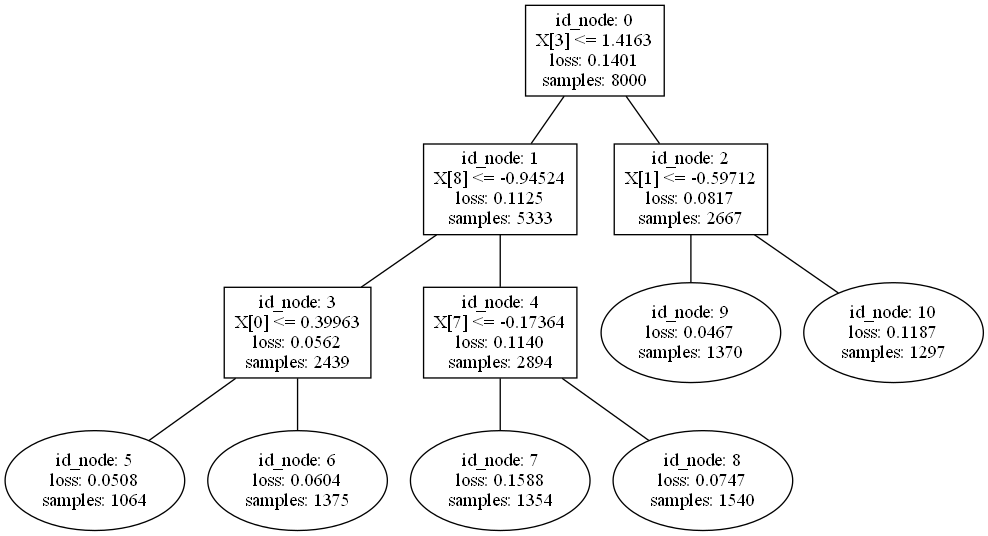

In [46]:
clf.plot_model()

In [47]:
pprint.pprint(clf.summary())

{0: {'children': (1, 2),
     'col': 3,
     'loss': 0.14012,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 8000,
     'th': 1.4163},
 1: {'children': (3, 4),
     'col': 8,
     'loss': 0.11251,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 5333,
     'th': -0.94524},
 2: {'children': (9, 10),
     'col': 1,
     'loss': 0.08174,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2667,
     'th': -0.59712},
 3: {'children': (5, 6),
     'col': 0,
     'loss': 0.05617,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2439,
     'th': 0.39963},
 4: {'children': (7, 8),
     'col': 7,
     'loss': 0.11403,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2894,
     'th': -0.17364},
 5: {'classes': array([0, 1, 2]),
     'loss': 0.05075,
     'models': RidgeClassifier(),
     'samples': 1064},
 6: {'classes': array([0, 1, 2]),
     'loss': 0.06036,
     'models': RidgeClassifi

In [48]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 11), 0.914375)

### crossentropy criterion

In [49]:
clf = LinearTreeClassifier(LogisticRegression(), criterion='crossentropy')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=LogisticRegression(),
                     criterion='crossentropy')

In [50]:
clf.feature_importances_

array([0.16432162, 0.14521493, 0.        , 0.17889327, 0.        ,
       0.        , 0.03135489, 0.        , 0.48021529, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [51]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 13), 0.933375)

# ACAS Xu Classification

In [84]:
import pickle

## Load data from ACAS Xu

train_x = pickle.load(open('ACAS_train_x.pickle', 'rb'))
train_y = pickle.load(open('ACAS_train_y.pickle', 'rb'))
test_x = pickle.load(open('ACAS_test_x.pickle', 'rb'))
test_y = pickle.load(open('ACAS_test_y.pickle', 'rb'))

In [85]:
clf = LinearTreeClassifier(LogisticRegression(), criterion='crossentropy')
clf.fit(train_x, train_y)

clf.feature_importances_

array([0.21712493, 0.38980194, 0.39307313, 0.        , 0.        ])

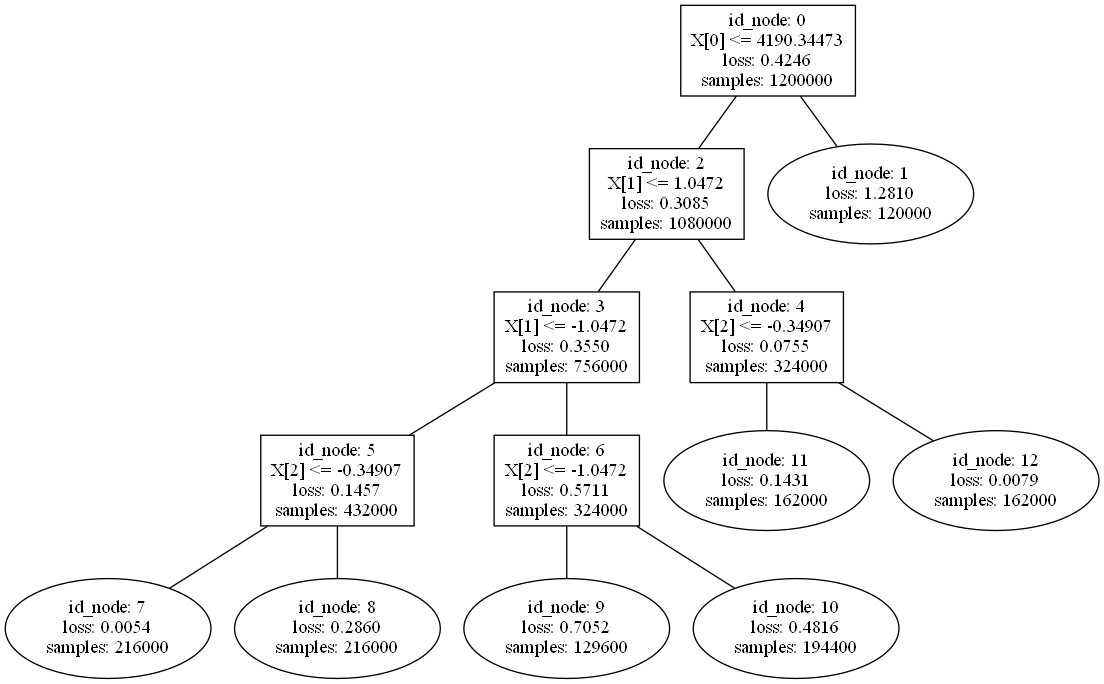

In [86]:
clf.plot_model()

In [94]:
pprint.pprint(clf.summary())

{0: {'children': (1, 2),
     'col': 0,
     'loss': 0.42458,
     'models': (LogisticRegression(), LogisticRegression()),
     'samples': 1200000,
     'th': 4190.34473},
 1: {'classes': array([0., 1., 2., 3., 4.]),
     'loss': 1.28097,
     'models': LogisticRegression(),
     'samples': 120000},
 2: {'children': (3, 4),
     'col': 1,
     'loss': 0.30848,
     'models': (LogisticRegression(), LogisticRegression()),
     'samples': 1080000,
     'th': 1.0472},
 3: {'children': (5, 6),
     'col': 1,
     'loss': 0.35498,
     'models': (LogisticRegression(), LogisticRegression()),
     'samples': 756000,
     'th': -1.0472},
 4: {'children': (11, 12),
     'col': 2,
     'loss': 0.0755,
     'models': (LogisticRegression(), LogisticRegression()),
     'samples': 324000,
     'th': -0.34907},
 5: {'children': (7, 8),
     'col': 2,
     'loss': 0.14569,
     'models': (LogisticRegression(), LogisticRegression()),
     'samples': 432000,
     'th': -0.34907},
 6: {'children': (9, 10)

In [95]:
clf.predict(train_x).shape, clf.predict_proba(train_x).shape, clf.apply(train_x).shape, clf.decision_path(train_x).toarray().shape, clf.score(train_x, train_y)

((1200000,), (1200000, 5), (1200000,), (1200000, 13), 0.88388)

In [97]:
clf.score(test_x, test_y)

0.876

In [98]:
results = clf.predict(train_x)
print(results[0:1000000:100000])

[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Plot Tree

In [99]:
train_x_fig = pickle.load(open('ACAS_train_x_fig.pickle', 'rb'))
train_y_fig = pickle.load(open('ACAS_train_y_fig.pickle', 'rb'))

tree_y_fig = clf.predict(train_x_fig)
print(clf.score(train_x_fig, train_y_fig))

0.831368


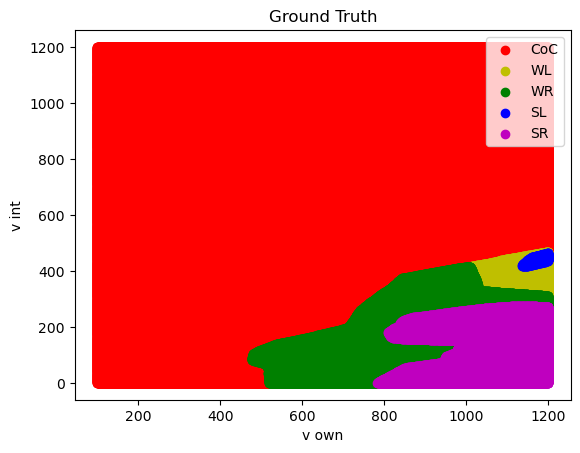

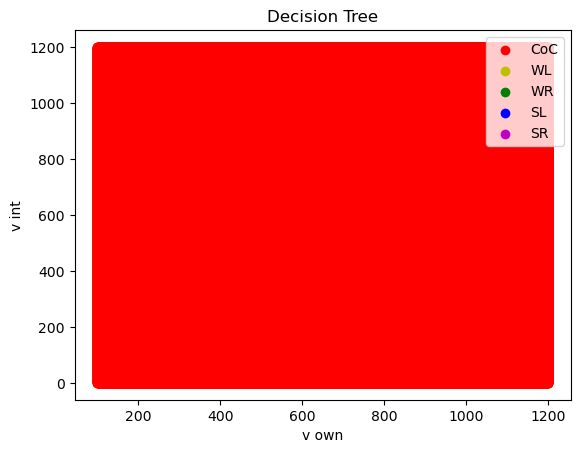

In [100]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def get_cmap(cmds):
    cmap_array = []
    labels = []
    for i in range(cmds.size):
        if cmds[i] == 0:
            cmap_array.append('r')
            labels.append('CoC')
        elif cmds[i] == 1:
            cmap_array.append('y')
            labels.append('WL')
        elif cmds[i] == 2:
            cmap_array.append('g')
            labels.append('WR')
        elif cmds[i] == 3:
            cmap_array.append('b')
            labels.append('SL')
        else:
            cmap_array.append('m')
            labels.append('SR')
    
    return cmap_array, labels

plt.figure(0)
cmap, labels = get_cmap(train_y_fig) #cm.rainbow(net_cmds / np.mean(net_cmds))

coc_labels = np.where(labels == 'CoC')
wl_labels = np.where(labels == 'WL')

values = ['CoC', 'WL', 'WR', 'SL', 'SR']

#plt.scatter(test_states[coc_labels, 3], test_states[coc_labels, 4], color = cmap[coc_labels], label = 'CoC')
#plt.scatter(test_states[wl_labels, 3], test_states[wl_labels, 4], color = cmap[wl_labels], label = 'WL')
colors = ['r', 'y', 'g', 'b', 'm']

for i in range(0, len(values)):
    ix = np.where(train_y_fig == i)
    plt.scatter(train_x_fig[ix, 3], train_x_fig[ix, 4], c = colors[i], label = values[i]) 
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = net_cmds)
plt.title("Ground Truth")
plt.xlabel("v own")
plt.ylabel("v int")
plt.legend()
#plt.legend(['r', 'y', 'g', 'b', 'm'], ['CoC', 'WL', 'WR', 'SL', 'SR'])

plt.figure(1)
#cmap2, labels2 = get_cmap(tree_cmds) #cm.rainbow(tree_cmds / np.mean(tree_cmds))
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = tree_cmds)
for i in range(0, len(values)):
    ix = np.where(tree_y_fig == i)
    plt.scatter(train_x_fig[ix, 3], train_x_fig[ix, 4], c = colors[i], label = values[i]) 
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = net_cmds)
plt.legend()


plt.title("Decision Tree")
plt.xlabel("v own")
plt.ylabel("v int")
#plt.legend(*scatter.legend_elements())
#plt.legend()


plt.show()

In [93]:
print(np.max(train_x_fig[:, 4]))

1200.0
